<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ufidon/ml/blob/main/mod5/ul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ufidon/ml/blob/main/mod5/ul.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>
<br>

Unsupervised Learning
---
_homl3 ch9_

The vast majority of the available data is unlabeled: 
- only input features $\mathbf{X}$, no labels $y$

ML on unlabeled data is called unsupervised ML, popular tasks includes:
- Dimensionality reduction
- Clustering
  - groups similar instances together into clusters, used in
  - data analysis, customer segmentation, recommender systems, etc.
- Anomaly detection (also called outlier detection)
  - learns what “normal” data looks like, and then uses that to detect abnormal instances, used in
  - fraud detection, detecting defective products, identifying new trends in time series, etc.
- Density estimation
  - estimates the probability density function (PDF) of the random process that generated the dataset, used in 
  - anomaly detection, data analysis and visualization, etc.

In [131]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sklearn as skl, sklearn.datasets as skds

# Clustering Algorithms: k-means and DBSCAN
- identifies similar instances and assigns them to clusters, or groups of similar instances
  - each instance gets assigned to a group
- Applications:
  - Customer segmentation, Image segmentation
  - Data analysis, Dimensionality reduction, Feature engineering
  - Anomaly detection (also called outlier detection)
  - Semi-supervised learning
  - Search engines
- What a cluster is depends on the context
  - Some algorithms look for instances centered around a particular point, called a centroid
  - Others look for continuous regions of densely packed instances: 
    - these clusters can take on any shape
  - Some algorithms are hierarchical, looking for clusters of clusters

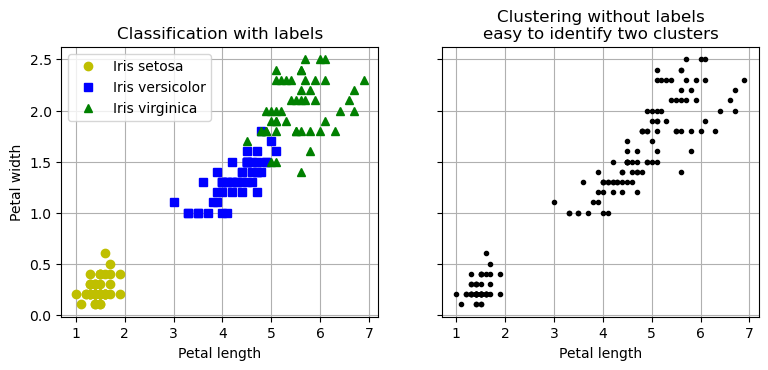

In [132]:
# 1.  Classification  vs. clustering 
# based on only two iris features: petal length and petal width

data = skds.load_iris()
X = data.data
y = data.target
data.target_names

fig1, ax1 = plt.subplots(1,2,figsize=(9, 3.5))

ax1[0].plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
ax1[0].plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
ax1[0].plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
ax1[0].set_xlabel("Petal length")
ax1[0].set_ylabel("Petal width")
ax1[0].grid()
ax1[0].legend()
ax1[0].set_title('Classification with labels')

ax1[1].scatter(X[:, 2], X[:, 3], c="k", marker=".")
ax1[1].set_xlabel("Petal length")
ax1[1].tick_params(labelleft=False)
ax1[1].set_axisbelow(True)
ax1[1].set_title('Clustering without labels\neasy to identify two clusters')
ax1[1].grid();

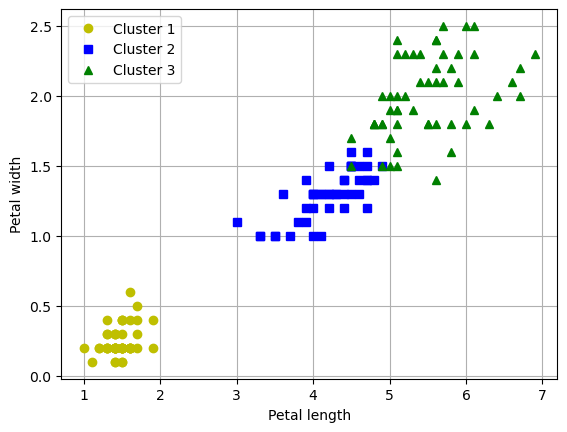

In [133]:
# 2. Clustering with all 4 iris features
# all three clusters are identified
# each instance gets assigned to a cluster

from scipy import stats
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode] = class_id

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

fig2, ax2 = plt.subplots()
ax2.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
ax2.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
ax2.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
ax2.set_xlabel("Petal length")
ax2.set_ylabel("Petal width")
ax2.legend(loc="upper left")
ax2.grid();

In [134]:
# 2.1 the ratio of iris plants assigned to the right cluster
(y_pred==y).sum() / len(y_pred)

0.9666666666666667


## k-means
- also called `Lloyd–Forgy algorithm`
- works well on datasets with obvious blobs far away from each other
- Two clustering schemes
  - assigning each instance to a single cluster is called `hard clustering`
  - giving each instance a score per cluster is called `soft clustering`, 
    - example scores
      - the distance between the instance and the centroid
      - similarity score (or affinity) such as the Gaussian radial basis function

In [135]:
# 1. The k-means algorithm is a simple algorithm 
# capable of very quickly and efficiently clustering a dataset with obvious blobs
# It will try to find each blob's center and assign each instance to the closest blob

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1.1 make 5 blobs
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

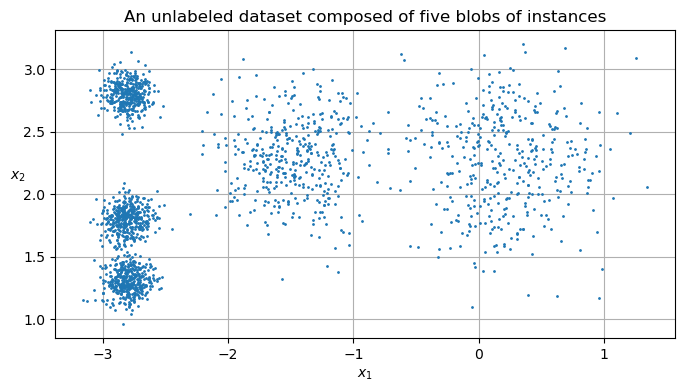

In [136]:
# visualize the 5 blobs

def plot_clusters(ax, X, y=None):
    ax.scatter(X[:, 0], X[:, 1], c=y, s=1)
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$", rotation=0)

fig3, ax3 = plt.subplots(figsize=(8, 4))
plot_clusters(ax3, X)
ax3.set_axisbelow(True)
ax3.set_title('An unlabeled dataset composed of five blobs of instances')
ax3.grid();

In [137]:

# 1.2 find the 5 blobs with k-mean
k = 5
kmeans = KMeans(n_clusters=k, n_init='auto', random_state=24)
y_pred = kmeans.fit_predict(X)

In [138]:
# 1.3 Each instance was assigned to one of the 5 clusters saved in attribute `labels_`
# the _label_ of an instance is the index of the cluster 
# that instance gets assigned to (they are not targets, they are predictions)

y_pred, kmeans.labels_

(array([2, 4, 1, ..., 3, 1, 4], dtype=int32),
 array([2, 4, 1, ..., 3, 1, 4], dtype=int32))

In [139]:
# 1.4 the 5 centroids saved in attribute `cluster_centers_`
kmeans.cluster_centers_, kmeans.cluster_centers_.shape

(array([[-1.46679593,  2.28585348],
        [ 0.20876306,  2.25551336],
        [-2.80037642,  1.30082566],
        [-2.79290307,  2.79641063],
        [-2.80389616,  1.80117999]]),
 (5, 2))

In [140]:
# 1.5 predict the labels of new instances:
X_new = np.array([[0, 2], [1, 3], [-3, 3], [-1.5, 2]])
kmeans.predict(X_new)

array([1, 1, 3, 0], dtype=int32)

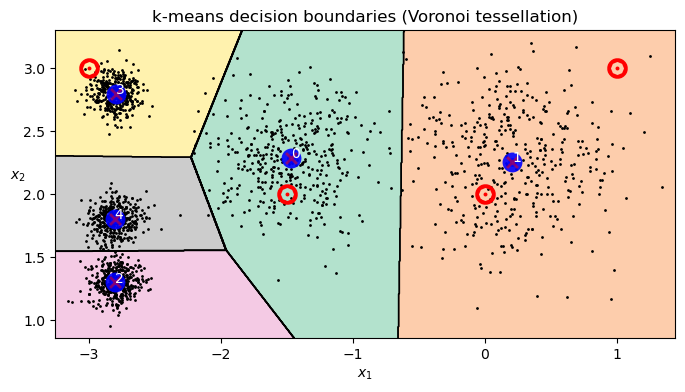

In [141]:
# 1.6 plot the cluster’s decision boundaries
# the boundaries form a Voronoi tessellation

def plot_data(ax, X):
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(ax, centroids, weights=None, circle_color='b', cross_color='r'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=40, linewidths=8,
                color=circle_color, zorder=3, alpha=0.9)
    ax.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=11,
                color=cross_color, zorder=4, alpha=0.5)
    for i, c in enumerate(centroids):
        ax.text(c[0], c[1], str(i), color='w', zorder=5)

def plot_decision_boundaries(ax, clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    ax.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(ax, X)
    if show_centroids:
        plot_centroids(ax, clusterer.cluster_centers_)

    if show_xlabels:
        ax.set_xlabel("$x_1$")
    else:
        ax.tick_params(labelbottom=False)
    if show_ylabels:
        ax.set_ylabel("$x_2$", rotation=0)
    else:
        ax.tick_params(labelleft=False)

fig4, ax4 = plt.subplots(figsize=(8, 4))
ax4.scatter(X_new[:,0], X_new[:, 1], marker='o', s=8, linewidths=12,
                color='red', zorder=11, alpha=1)
plot_decision_boundaries(ax4, kmeans, X)
ax4.set_title('k-means decision boundaries (Voronoi tessellation)');

- k-mean does not work well when the blobs have very different diameters 
  - because an instance is assigned to a cluster based on its distance to the centroid
  - instances close to the boundaries were probably assigned to the wrong cluster

In [142]:
# 1.7  the `transform()` method measures 
# the distance from each instance to every centroid
# which can be used as the scores for soft clustering

kmeans.transform(X_new).round(2)

array([[1.49, 0.33, 2.89, 2.9 , 2.81],
       [2.57, 1.09, 4.16, 3.8 , 3.99],
       [1.69, 3.29, 1.71, 0.29, 1.21],
       [0.29, 1.73, 1.48, 1.52, 1.32]])

In [143]:
# 1.8 his is indeed the Euclidian distance between each instance and each centroid
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[1.49, 0.33, 2.89, 2.9 , 2.81],
       [2.57, 1.09, 4.16, 3.8 , 3.99],
       [1.69, 3.29, 1.71, 0.29, 1.21],
       [0.29, 1.73, 1.48, 1.52, 1.32]])

### The k-means Algorithm
- one of the fastest and simplest clustering algorithms
- First initialize $k$ centroids randomly: 
  - e.g., $k$ distinct instances are chosen randomly from the dataset 
  - and the centroids are placed at their locations.
- Repeat until convergence, i.e., until the centroids stop moving:
  - Assign each instance to the closest centroid
  - Update the centroids to be the mean of the instances that are assigned to them
- It’s guaranteed to converge in a finite number of steps, because 
  - the mean squared distance between the instances and their closest centroids can only go down at each step
  - and it cannot be negative
- The `KMeans` class uses an optimized initialization technique by default
  - set `init="random"` and `n_init=1` to show k-means iteration

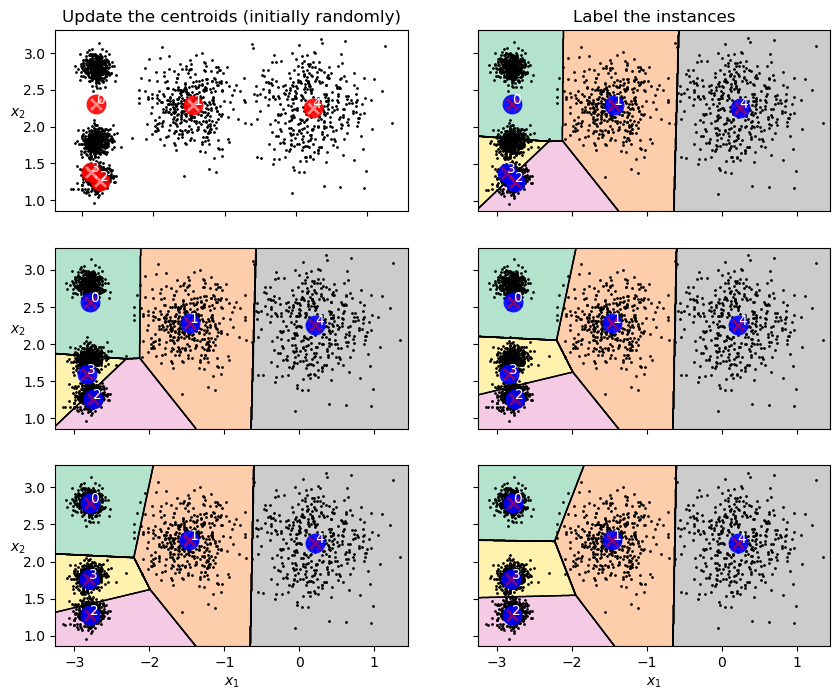

In [144]:
# 1. The movement of centroids of the k-means algorithm

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=1,
                      random_state=3)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=2,
                      random_state=3)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1, max_iter=3,
                      random_state=3)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

fig5, ax5 = plt.subplots(3,2,figsize=(10, 8))

plot_data(ax5[0,0], X)
plot_centroids(ax5[0,0], kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
ax5[0,0].set_ylabel("$x_2$", rotation=0)
ax5[0,0].tick_params(labelbottom=False)
ax5[0,0].set_title("Update the centroids (initially randomly)")

plot_decision_boundaries(ax5[0,1], kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
ax5[0,1].set_title("Label the instances")

plot_decision_boundaries(ax5[1,0], kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(ax5[1,0], kmeans_iter2.cluster_centers_)

plot_decision_boundaries(ax5[1,1], kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plot_decision_boundaries(ax5[2,0], kmeans_iter2, X, show_centroids=False)
plot_centroids(ax5[2,0], kmeans_iter3.cluster_centers_)

plot_decision_boundaries(ax5[2,1], kmeans_iter3, X, show_ylabels=False)

- K-means is guaranteed to converge
  - but may not converge to the right solution 
    - i.e., it may converge to a local optimum 
  - whether it does or not depends on the centroid initialization
- The computational complexity of K-means is generally linear to
  - the number of instances n
  - the number of clusters k
  - and the number of dimensions m
  - this is only true when the data has a clustering structure
    - otherwise the worst-case complexity can increase exponentially with n

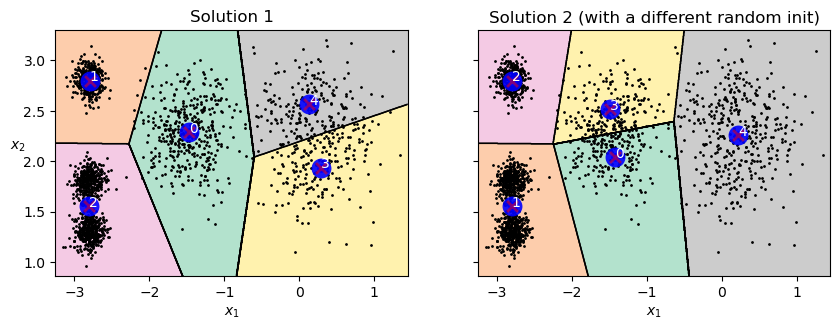

In [145]:
# 2. run K-Means multiple times (or with different random seeds), 
# it can converge to very different solutions

def plot_clusterer_comparison(axs, clusterer1, clusterer2, X, title1=None,
                              title2=None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plot_decision_boundaries(axs[0], clusterer1, X)
  if title1:
    axs[0].set_title(title1)

  plot_decision_boundaries(axs[1], clusterer2, X, show_ylabels=False)
  if title2:
    axs[1].set_title(title2)

kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, random_state=5)

fig6, ax6 = plt.subplots(1, 2, figsize=(10, 3.2))
plot_clusterer_comparison(ax6, kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1",
                          "Solution 2 (with a different random init)")

### Centroid initialization methods
- set the `init` hyperparameter to the list of approximate centroids
- run the algorithm multiple times with different random initializations 
  - and keep the best solution
  - the `n_init` hyperparameter determines the times of random initialization
    - default to be 10
    - `KMeans` keeps the best solution measured with a performance metric `inertia`
      - `inertia`  is the sum of the squared distances between the instances and their closest centroids
      - saved in a model's `inertia_` instance variable
      - score() method returns the negative inertia following the "greater is better” rule
- The k-means algorithm
  - divides a set of $N$ samples $\mathbf{X}$ into K disjoint clusters $C$, each described by the mean $\mu_j$ of the samples in the cluster
  - aims to choose centroids that minimize the `inertia`, or `within-cluster sum-of-squares` criterion:
    - $\displaystyle \sum_{i=0}^{N}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$
- The best solution of k-means forms a `Voronoi diagram`
  - $\displaystyle C_k = \{x \in X | \lVert x - \mu_k\rVert^2 \le \lVert x - \mu_j\rVert^2\}$ for all $j\neq k$

In [146]:
# 1. set the `init` hyperparameter to the list of approximate centroids
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

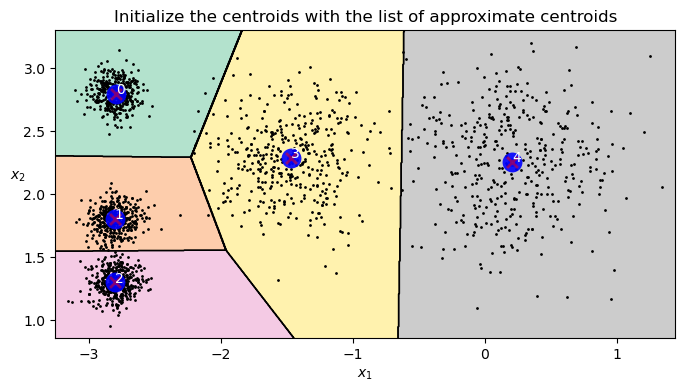

In [147]:
# 1.1 print the decision boundaries
fig7, ax7 = plt.subplots(figsize=(8, 4))
plot_decision_boundaries(ax7, kmeans, X)
ax7.set_title('Initialize the centroids with the list of approximate centroids');

In [148]:
# 2. k-means model's inertia and score
# do not fix parameter `random_state`

kmeansr = KMeans(n_clusters=5, init='random', n_init=10)
kmeansr.fit(X)
(kmeans.inertia_, kmeans.score(X)), (kmeansr.inertia_, kmeansr.score(X))

((211.5985372581684, -211.59853725816836),
 (211.5985372581684, -211.5985372581684))

### [k-means++: a centroid initialization scheme](https://en.wikipedia.org/wiki/K-means%2B%2B)
- selects centroids that are distant from one another
- makes the k-means algorithm much less likely to converge to a suboptimal solution
- steps
  - Choose one centroid uniformly at random among the dataset
  - For each data point x not chosen yet,
    - compute the distance D(x) between x and the nearest centroid that has already been chosen
  - Choose one new data point at random as a new centroid,
    - using a weighted probability distribution where a point x is chosen with probability proportional to D²(x)
    - This probability distribution ensures that instances farther away from already chosen centroids are much more likely to be selected as centroids
  - Repeat the previous steps until all k centroids have been chosen
- `KMeans` class uses this initialization method by default
  - or explicitly set `init="k-means++"`

### Accelerated k-means and mini-batch k-means
- `algorithm="elkan"` exploits the triangle inequality to avoid unnecessary distance calculation
  - does not always accelerate training, depends on the dataset
  - For regular KMeans, use `algorithm="full"`. The default is `"auto"`.
- `Mini-batch k-means` uses mini-batches to move the centroids slightly at each iteration
  - this speeds up the algorithm (typically by a factor of three to four) 
  - and makes it possible to cluster huge datasets that do not fit in memory

In [149]:
# 1. exploit mini-batch k-means
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [150]:
minibatch_kmeans.inertia_

211.65899374574312

In [151]:
# 2. use the `memmap` class to handle large dataset that does not fit in memory
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, parser="auto")

# split the dataset
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
X_test, y_test = mnist.data[60000:], mnist.target[60000:]

# save the training set to a memmap
filename = "my_mnist.mmap"
X_memmap = np.memmap(filename, dtype='float32', mode='write',
                     shape=X_train.shape)
X_memmap[:] = X_train
X_memmap.flush()

# cluster with mini-batch k-means
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,
                                   n_init=3, random_state=42)
minibatch_kmeans.fit(X_memmap)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

In [152]:
!rm my_mnist.mmap

- The mini-batch k-means algorithm is much faster than the regular k-means algorithm
  - but its inertia is generally slightly worse

In [153]:
# 3. compares the inertias of mini-batch k-means and regular k-means models 
# trained on the previous five-blobs dataset using various numbers of clusters k

from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

100/100

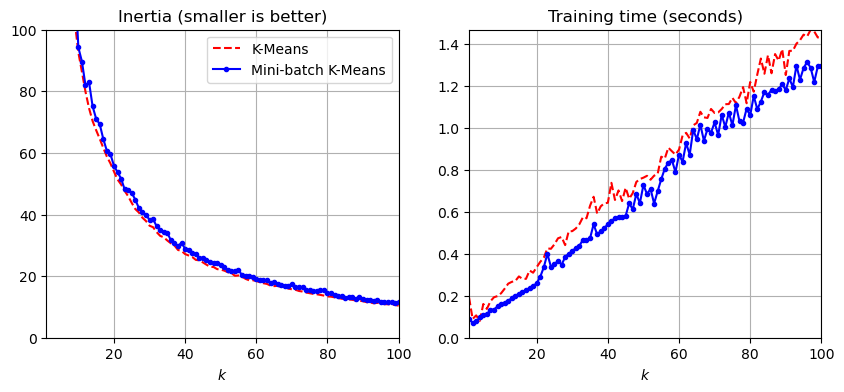

In [154]:
# visualize
fig8, ax8 = plt.subplots(1,2, figsize=(10, 4))

ax8[0].plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
ax8[0].plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
ax8[0].set_xlabel("$k$")
ax8[0].set_title("Inertia (smaller is better)")
ax8[0].legend()
ax8[0].axis([1, max_k, 0, 100])
ax8[0].grid()

ax8[1].plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
ax8[1].plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
ax8[1].set_xlabel("$k$")
ax8[1].set_title("Training time (seconds)")
ax8[1].axis([1, max_k, 0, times.max()])
ax8[1].grid();

### Finding the optimal number of clusters
- the lowest inertia is not a good metric for the optimal number of clusters
  - because the inertia decreases when the number of clusters increases
    - the more clusters there are, the closer each instance will be to its closest centroid, 
    - and therefore the lower the inertia will be

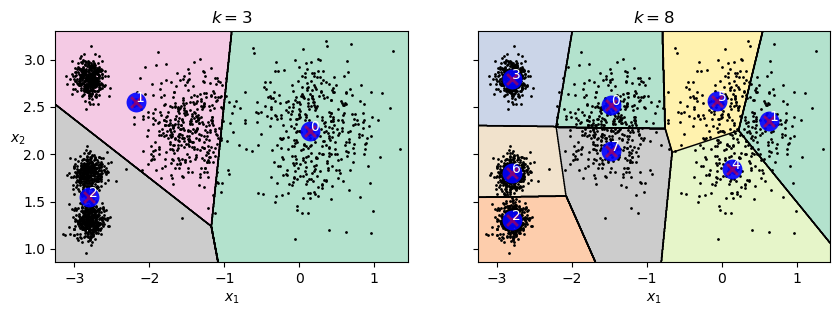

In [155]:
# 1. Specify the number of clusters explicitly

kmeans_k3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)

fig9, ax9 = plt.subplots(1,2, figsize=(10, 3))
plot_clusterer_comparison(ax9, kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

In [156]:
# the more clusters, the lower inertia
kmeans_k3.inertia_, kmeans.inertia_, kmeans_k8.inertia_

(653.2167190021554, 211.5985372581684, 119.22484592677122)

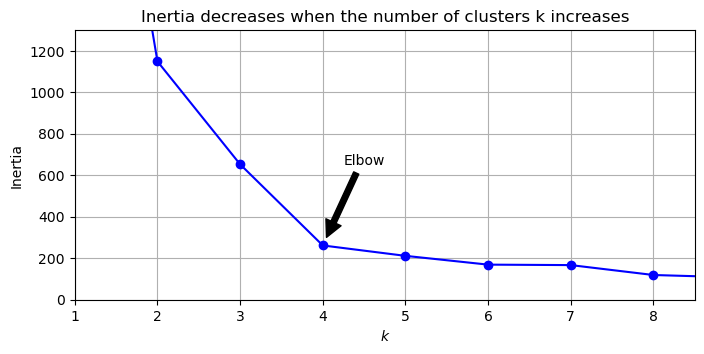

In [157]:
# 2. inertia vs the number of clusters k

kmeans_per_k = [KMeans(n_clusters=k, n_init=10, init='random').fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

figa, axa = plt.subplots(figsize=(8, 3.5))
axa.plot(range(1, 10), inertias, "bo-")
axa.set_xlabel("$k$")
axa.set_ylabel("Inertia")
axa.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
axa.text(4.5, 650, "Elbow", horizontalalignment="center")
axa.axis([1, 8.5, 0, 1300])
axa.set_title('Inertia decreases when the number of clusters k increases')
axa.grid();

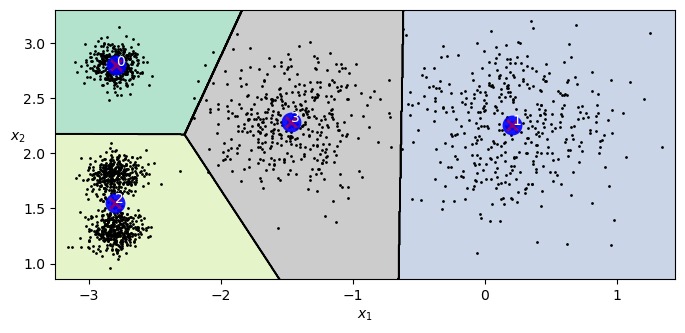

In [158]:
# 3. the `elbow` above shows a good trade-off
# even though the bottom-left two blobs are clustered into one

figb, axb = plt.subplots(figsize=(8, 3.5))
plot_decision_boundaries(axb, kmeans_per_k[4 - 1], X)

- A better metric for the optimal number of clusters is `silhouette score`
  - which is `the mean silhouette coefficient` over all the instances
- An instance's silhouette coefficient $s = \displaystyle \frac{b-a}{\max(a,b)}$
  - $a$, the _mean intra-cluster distance_, 
    - the mean distance to the other instances in the same cluster 
  - $b$, the _mean nearest-cluster distance_, 
    - the mean distance to the instances of the next closest cluster
- $s$ has a range of [-1,1]: 
  - $s$ close to 1 means that the instance is well inside its own cluster and far from other clusters
  - $s$ close to 0 means that it is close to a cluster boundary
  - $s$ close to -1 means that it may have been assigned to the wrong cluster

In [159]:
# 1. calculate the silhouette score of a k-means model
# the highest score here is 5 clusters

from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans_k3.labels_), silhouette_score(X, kmeans.labels_), silhouette_score(X, kmeans_k8.labels_)

(0.5723900247411775, 0.655517642572828, 0.5579862566123451)

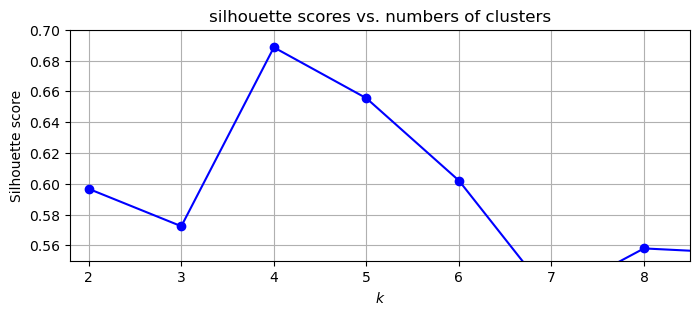

In [160]:
# 2. plot the silhouette scores vs. the numbers of clusters
# confirm the top two scores with number of clusters 4 and 5

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

figc, axc = plt.subplots(figsize=(8, 3))
axc.plot(range(2, 10), silhouette_scores, "bo-")
axc.set_xlabel("$k$")
axc.set_ylabel("Silhouette score")
axc.axis([1.8, 8.5, 0.55, 0.7])
axc.set_title('silhouette scores vs. numbers of clusters')
axc.grid();

- `silhouette diagram` is a more informative visualization
- It plots every instance’s silhouette coefficient
  - sorted by the clusters they are assigned to and by the value of the coefficient
- Each diagram contains one knife shape per cluster
  - The shape’s height indicates the number of instances in the cluster
  - its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better)
  - the more even these blade sizes, the better the model

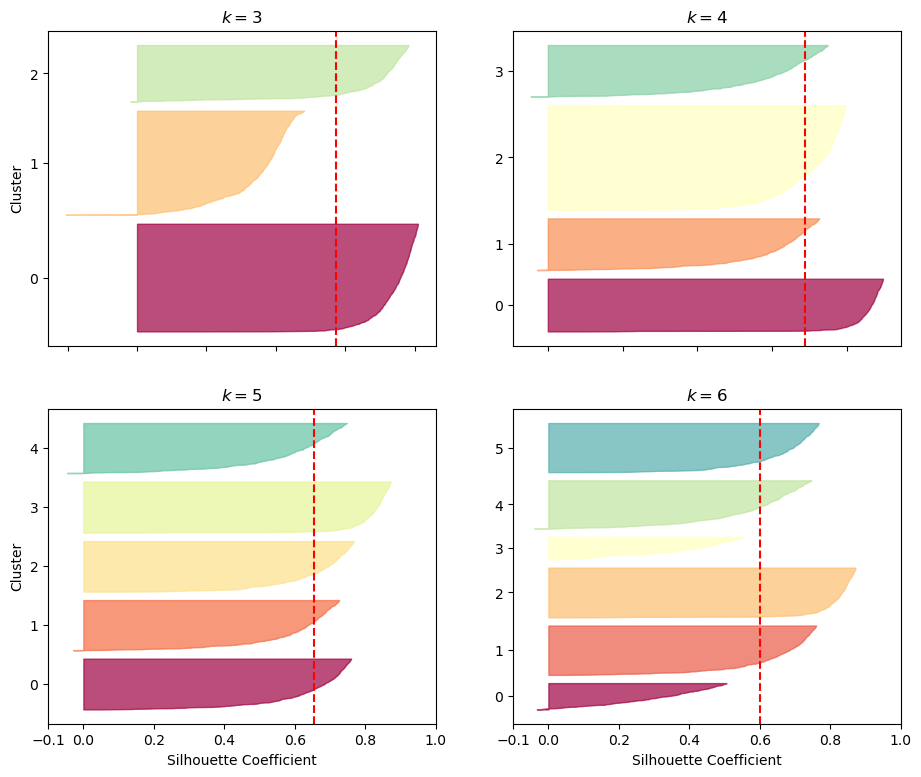

In [161]:
# 3. plot the silhouette diagram
# a) The vertical red dashed lines represent 
#   the mean silhouette score for each number of clusters
# b) `k=5` has the most even blade sizes 
#   even though its `silhouette score` < `k=4`'s

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

figd, axd = plt.subplots(2,2,figsize=(11, 9))

for ai in range(4):
    ax = axd[ai//2, ai%2]
    k = ai+3 # 3,4,5,6
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        ax.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    ax.yaxis.set_major_locator(FixedLocator(ticks))
    ax.yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        ax.set_ylabel("Cluster")
    
    if k in (5, 6):
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax.set_xlabel("Silhouette Coefficient")
    else:
        ax.tick_params(labelbottom=False)

    ax.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    ax.set_title(f"$k={k}$");

### Limits of k-means
- It is necessary to run the algorithm several times to avoid suboptimal solutions
- does not work very well on the clusters with varying sizes, different densities, or nonspherical shapes
  - but Gaussian mixture models work great
- Scaling the input features generally helps k-means

In [162]:
# 1. k-means does not work very well on
# ellipsoidal clusters of different dimensions, densities, and orientations

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

kmeans_good = KMeans(n_clusters=3,
                     init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]),
                     n_init=1)
kmeans_bad = KMeans(n_clusters=3, n_init=10)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, n_init=10)

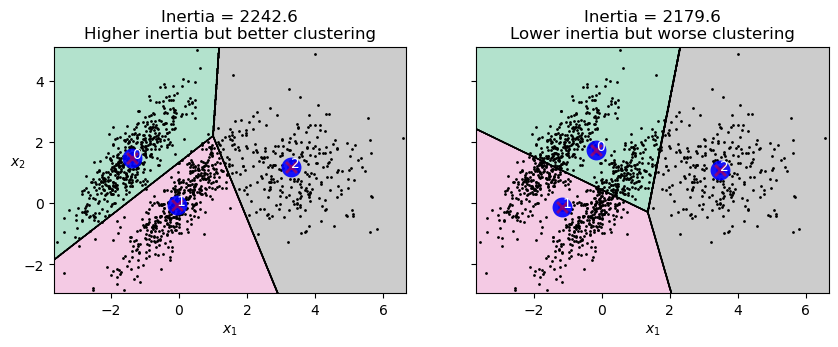

In [163]:
# 1.1 visualize the decision boundaries of kmeans_good and kmeans_bad
fige, axe = plt.subplots(1,2, figsize=(10, 3.2))

plot_decision_boundaries(axe[0], kmeans_good, X)
axe[0].set_title(f"Inertia = {kmeans_good.inertia_:.1f}\nHigher inertia but better clustering")

plot_decision_boundaries(axe[1], kmeans_bad, X, show_ylabels=False)
axe[1].set_title(f"Inertia = {kmeans_bad.inertia_:.1f}\nLower inertia but worse clustering");

### Using Clustering for Image Segmentation
- `Image segmentation` is the task of partitioning an image into multiple segments
- Three variants of image segmentation
  - `color segmentation`
    - pixels with a similar color get assigned to the same segment
    - sufficient for many applications such as analyzing satellite images
  - `semantic segmentation`
    - all pixels that are part of the `same object type` get assigned to the same segment
    - such as recognizing objects in vision system
  - `instance segmentation`
    - all pixels that are part of the `same individual object` are assigned to the same segment
    - such as counting objects in vision system
- The state of the art ML model in semantic or instance segmentation today is `convolutional neural networks`

In [164]:
# 1. Image segmentation using k-means with various numbers of color clusters
# 1.0 load the image
# this image has RGB three channels
import PIL

image = np.asarray(PIL.Image.open("./img/ladybug.png"))
image.shape

(533, 800, 3)

In [165]:
# 1.1 cluster the pixels into `n_clusters` clusters
# reshape the image into a long list of RGB colors
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10).fit(X)
# `segmented_img` contains the mean color of each pixel’s cluster
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
# reshapes `segmented_img` to the original image shape for display
segmented_img = segmented_img.reshape(image.shape)

In [166]:
# 1.2 experiment with various numbers of clusters
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

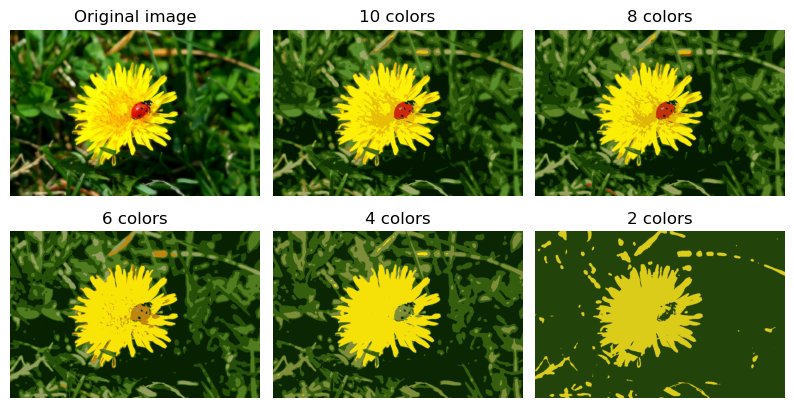

In [167]:
# 1.3 visualize the clusters
figf, axf = plt.subplots(2, 3, figsize=(10, 5))
figf.subplots_adjust(wspace=0.05, hspace=0.1)

axf[0,0].imshow(image)
axf[0,0].set_title("Original image")
axf[0,0].axis('off')

for idx, n_clusters in enumerate(n_colors):
    ax = axf[(idx+1)//3, (idx+1)%3]
    ax.imshow(segmented_imgs[idx] / 255)
    ax.set_title(f"{n_clusters} colors")
    ax.axis('off')

### Using Clustering for Semi-Supervised Learning
- `semi-supervised learning` 
  - handles datasets with plenty of unlabeled instances and very few labeled instances
  - assigns labels to the unlabeled instances after learning the labeled instances
    - implemented in sklearn.semi_supervised `LabelSpreading` and `LabelPropagation`
- implemented in `SelfTrainingClassifier`
  - give it a base classifier (such as a RandomForestClassifier) 
  - train it on the labeled instances
  - use it to predict labels for the unlabeled sample
  - It then updates the training set with the labels it is most confident about, 
  - and repeats this process of training and labeling until it cannot add labels anymore

In [168]:
# 1. load the simple MNIST-like dataset 
# containing 1,797 grayscale 8×8 images representing digits 0 to 9

X_digits, y_digits = skds.load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [169]:
# 2. Let's look at the performance of a logistic regression model 
# suppose we only have 50 labeled instances:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [170]:
log_reg.score(X_test, y_test)

0.7481108312342569

In [171]:
# 2.1 measure the accuracy again when we use the whole training set
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)
log_reg_full.score(X_test, y_test)

0.906801007556675

In [172]:
# 3. semi-supervising learning
# use k-means to find the representative images from the training set 
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=8)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

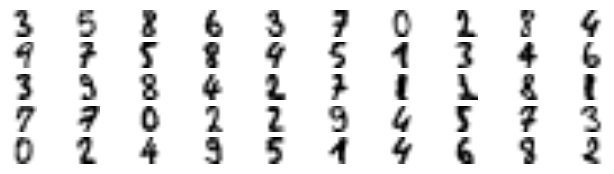

In [173]:
# 3.1 plot these representative images
# figg, axg = plt.subplots(10,10, figsize=(10, 3))
# for index, X_representative_digit in enumerate(X_representative_digits):
#     ax = axg[index//10, index%10]
#     ax.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
#                interpolation="bilinear");
#     ax.axis('off');

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

In [174]:
# 3.2 label the representative images manually
# 
y_representative_digits = np.array([
    3, 5, 8, 6, 3, 7, 0, 2, 8, 4,
    9, 7, 5, 8, 4, 5, 1, 3, 4, 6,
    3, 9, 8, 4, 2, 7, 1, 1, 8, 1,
    7, 7, 0, 2, 2, 9, 4, 5, 7, 3,
    0, 2, 4, 9, 5, 1, 4, 6, 8, 2
])

In [175]:
# 3.3 representative images are training set with better quality
# the score improved even though we still have only 50 training instances
# from 0.7481108312342569 to 0.8740554156171285
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8740554156171285

In [176]:
# 3.4 label unlabelled instances mechanically: 
# by propagating the labels to all the other instances in the same cluster
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [177]:
# 3.5 train a model again with the mechanically labeled training set
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [178]:
# the score improved a tiny bit
# from 0.8740554156171285 to 0.8790931989924433
log_reg.score(X_test, y_test)

0.8790931989924433

In [179]:
# 3.6 tidy the training set by 
# ignoring the 1% instances that are farthest from their cluster center: 
# this should eliminate some outliers

percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [180]:
# 3.7 train a model again with the tidied dataset
# the score improved a tiny bit again
# from 0.8790931989924433 to 0.889168765743073
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.889168765743073

In [181]:
# Our propagated labels are actually pretty good: 
# their accuracy is about 97.6%:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9777777777777777

## DBSCAN
- short for `density-based spatial clustering of applications with noise` algorithm
- implemented in sklearn `DBSCAN` class with just 
  - two hyperparameters `eps` and `min_samples`
- defines clusters as continuous regions of high density well separated by low-density regions
- It identifies clusters or dense regions by core instances
  - a core instance has at least `min_samples` instances in its `ε-neighborhood`
- All instances in the neighborhood of a core instance belong to the same cluster
  - This neighborhood may include other core instances
  - therefore, a long sequence of neighboring core instances forms a single cluster
- Any instance that is not a core instance and does not have one in its neighborhood is considered an `anomaly`
- Its computational complexity is roughly $O(n^2m)$, so it does not scale well to large datasets

In [182]:
# 1. train a DBSCAN model on a moon dataset
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [183]:
# 1.1 The labels of all the instances are now available in 
# the labels_instance variable.
#  Instances have a cluster index equal to –1 are considered as anomalies by the algorithm
dbscan.labels_.shape, dbscan.labels_[:10]

((1000,), array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5]))

In [184]:
# 1.2 The indices of the core instances are available in 
# the `core_sample_indices_` instance variable
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [185]:
# 1.3 The core instances themselves are available in 
# the `components_` instance variable
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

In [186]:
# 1.4 Train one more DBSCAN model with a different neighborhood radius
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

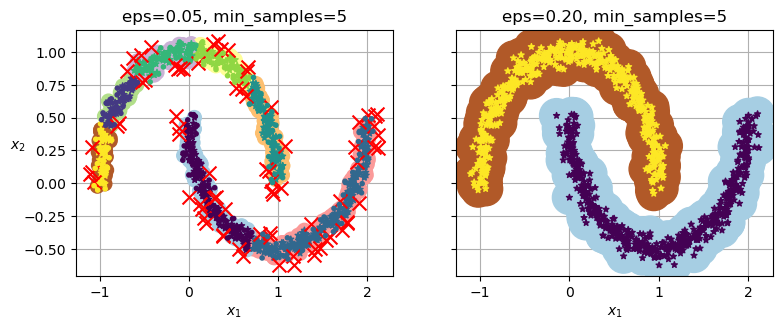

In [187]:
# 1.5 visualize the two DBSCAN models
def plot_dbscan(ax, dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    ax.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    ax.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    ax.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    ax.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        ax.set_xlabel("$x_1$")
    else:
        ax.tick_params(labelbottom=False)
    if show_ylabels:
        ax.set_ylabel("$x_2$", rotation=0)
    else:
        ax.tick_params(labelleft=False)
    ax.set_title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    ax.grid()
    ax.set_axisbelow(True)



figh, axh = plt.subplots(1,2,figsize=(9, 3.2))
plot_dbscan(axh[0], dbscan, X, size=100)
plot_dbscan(axh[1], dbscan2, X, size=600, show_ylabels=False)

- In the left plot
  - the smaller eps, the more clusters (7 clusters)
  - and the more outliers marked with red crosses
- In the right plot
  - the larger eps, the less clusters (2 clusters) 
  - and the less outliers (0 here)

In [188]:
# 2. DBSCAN class has no predict() method
# used with those classifiers with predict() method
dbscan = dbscan2  # we now use eps=0.2

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
# train the classifier on the core instances only
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [189]:
# 2.1 make prediction, output class labels
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [190]:
# 2.2 make prediction, output class probabilities
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

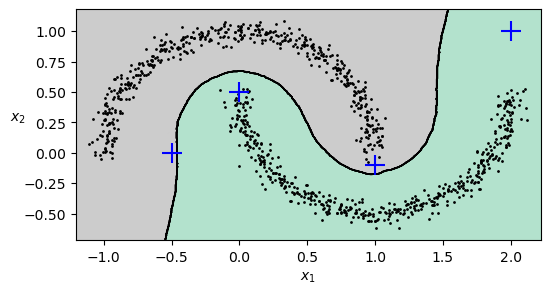

In [191]:
# 2.3 visualize the classifier decision boundary
figi, axi = plt.subplots(figsize=(6, 3))
plot_decision_boundaries(axi, knn, X, show_centroids=False)
axi.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10);

## DBSCAN summary
- robust to outliers
- capable of identifying any number of clusters of any shape
- defines clusters as continuous regions of high density well separated by low-density regions, ∴ not suitable for cases such as 
  - the density varies significantly across the clusters
  - there’s no sufficiently low-density region around some clusters

# Other Clustering Algorithms
- Agglomerative clustering
- The balanced iterative reducing and clustering using hierarchies (BIRCH)
- Mean-shift
- Affinity propagation
- Spectral clustering

# Gaussian Mixtures
- A `Gaussian mixture model (GMM)` is a probabilistic model that
  - assumes the instances were generated from a mixture of several Gaussian distributions whose parameters are unknown
  - all the instances generated from a single Gaussian distribution form a cluster that typically looks like an ellipsoid
    - each ellipsoid can have different shape, size, density, and orientation
- There are several GMM variants
  - `GaussianMixture` class
    - the number k of Gaussian distributions must be known in advance
    - relies on the `expectation-maximization (EM)` algorithm

In [192]:
# 1. generate three ellipsoids
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [193]:
# 1.1 train a Gaussian mixture model on the three ellipsoids
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [194]:
# 1.2 look at the parameters that the expectation-maximization (EM) algorithm estimated
print(f'cluster weights={gm.weights_}\n{gm.means_=}\n{gm.covariances_=}')
print(f'{gm.converged_=}\n{gm.n_iter_=}')

cluster weights=[0.40005972 0.20961444 0.39032584]
gm.means_=array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])
gm.covariances_=array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])
gm.converged_=True
gm.n_iter_=4


In [195]:
# 2. use the model to predict
# - which cluster each instance belongs to (hard clustering) 
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1])

In [196]:
# - or the probabilities that it came from each cluster (soft clustering)
gm.predict_proba(X).round(3)

array([[0.   , 0.023, 0.977],
       [0.001, 0.016, 0.983],
       [1.   , 0.   , 0.   ],
       ...,
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ]])

In [197]:
# 3. This is a generative model, so you can 
# - sample new instances from it
#   - Notice that they are sampled sequentially from each cluster
# - and get their labels

X_new, y_new = gm.sample(6)
X_new, y_new

(array([[-2.32491052,  1.04752548],
        [-1.16654983,  1.62795173],
        [ 1.84860618,  2.07374016],
        [ 3.98304484,  1.49869936],
        [ 3.8163406 ,  0.53038367],
        [ 0.38079484, -0.56239369]]),
 array([0, 0, 1, 1, 1, 2]))

In [198]:
# 4. estimate the log of the `probability density function`` (PDF) 
# at any location using the `score_samples()` method
gm.score_samples(X_new).round(2)

array([-3.33, -2.02, -3.91, -3.7 , -3.66, -3.83])

In [199]:
# 4.1 check that the PDF integrates to 1 over the whole space
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225091

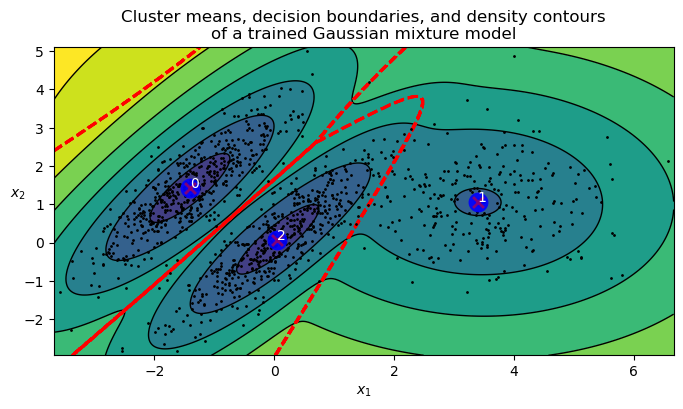

In [200]:
# 5. plot the resulting decision boundaries (dashed lines) and density contours:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(ax, clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    ax.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    ax.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(ax, clusterer.means_, clusterer.weights_)

    ax.set_xlabel("$x_1$")
    if show_ylabels:
        ax.set_ylabel("$x_2$", rotation=0)
    else:
        ax.tick_params(labelleft=False)

figj, axj = plt.subplots(figsize=(8, 4))

plot_gaussian_mixture(axj, gm, X)
axj.set_title('Cluster means, decision boundaries, and density contours' 
              '\nof a trained Gaussian mixture model');


- EM struggles to converge to the optimal solution of  
  - real-world data with many dimensions, or many clusters, or few instances
- It is helpful to set the `covariance_type` hyperparameter to one of the following values
  - "spherical": 
    - All clusters must be spherical 
    - but may with different diameters 
      - i.e., different variances
  - "diag":
    - Clusters can take on any ellipsoidal shape of any size
    - but the ellipsoid’s axes must be parallel to the coordinate axes
      - i.e., the covariance matrices must be diagonal
  - "tied":
    - All clusters must have the same ellipsoidal shape, size, and orientation 
      - i.e., all clusters share the same covariance matrix
  - "full": default
    - each cluster can take on any shape, size, and orientation

In [201]:
# 1. solutions found by the EM algorithm 
# when covariance_type is set to "tied" or "spherical"

gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

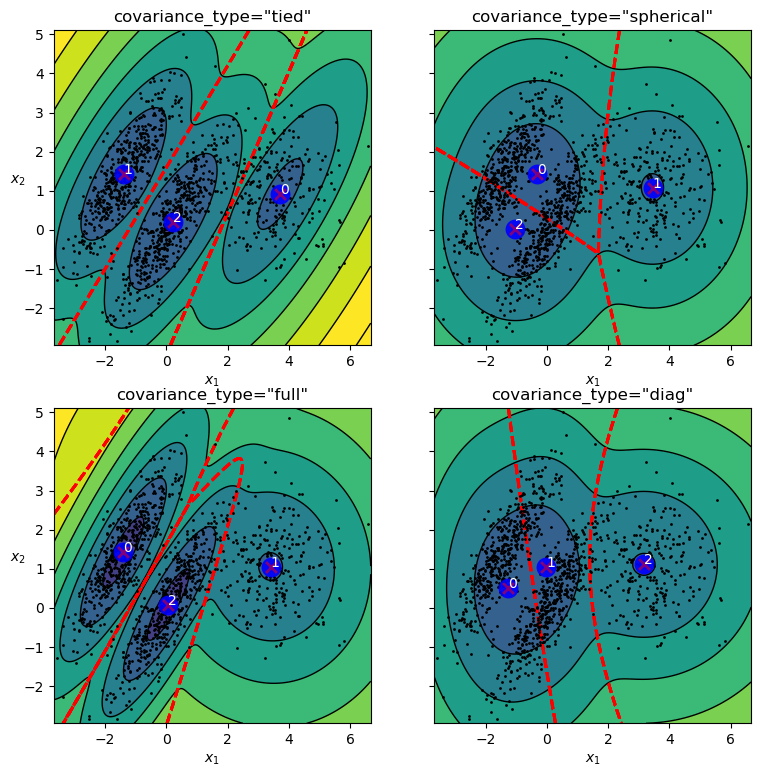

In [202]:
# 1.1 visualize all solutions
def compare_gaussian_mixtures(ax, gm1, gm2, X):
    plot_gaussian_mixture(ax[0], gm1, X)
    ax[0].set_title(f'covariance_type="{gm1.covariance_type}"')

    plot_gaussian_mixture(ax[1], gm2, X, show_ylabels=False)
    ax[1].set_title(f'covariance_type="{gm2.covariance_type}"')
    
figk, axk = plt.subplots(2, 2, figsize=(9, 9))
compare_gaussian_mixtures(axk[0], gm_tied, gm_spherical, X)
compare_gaussian_mixtures(axk[1], gm_full, gm_diag, X)

- The computational complexity of training a GaussianMixture model depends on 
  - the number of instances n, 
  - the number of dimensions m, 
  - the number of clusters k, 
  - and the constraints on the covariance matrices. 
- If covariance_type is "spherical" or "diag", 
  - it is $O(kmn)$, assuming the data has a clustering structure. 
- If covariance_type is "tied" or "full", it is $O(knm^2 + km^3)$, 
  - so it will not scale to large numbers of features


## Using Gaussian Mixtures for Anomaly Detection
- any instance located in a low-density region can be considered an anomaly
- by defining what density threshold to use
- `outlier detection` is often used to clean up a dataset
- A closely related task is `novelty detection`
  - trained on a clean dataset uncontaminated by outliers

In [203]:
# 1.  identify the outliers using the fourth percentile lowest density as the threshold
# i.e., approximately 4% of the instances will be flagged as anomalies
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

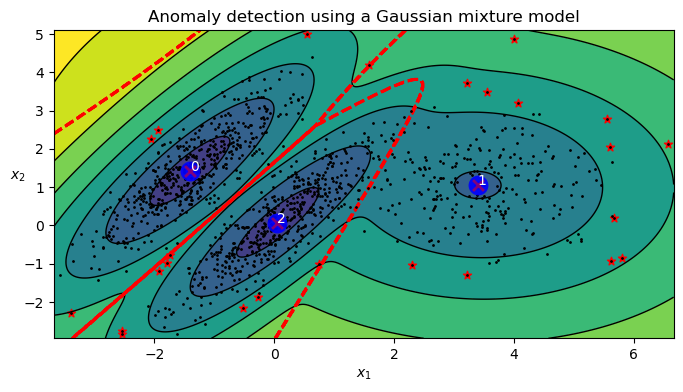

In [204]:
# 1.1 visualize outliers marked with red stars
figl, axl = plt.subplots(figsize=(8, 4))

plot_gaussian_mixture(axl, gm, X)
axl.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
axl.set_ylim(top=5.1)
axl.set_title('Anomaly detection using a Gaussian mixture model');

### Best practice
- fit a Gaussian mixture model once, 
- use it to detect and remove the most extreme outliers, 
- then fit the model again on the cleaned-up dataset. 
- Another approach is to use robust covariance estimation methods
  - such as `EllipticEnvelope` class


## Selecting the Number of Clusters
- that minimizes a theoretical information criterion such as 
  - the `Bayesian information criterion (BIC)` 
  - or the `Akaike information criterion (AIC)`
- Given a dataset with n instances and m features,
  - $BIC = p\log n - 2\log \widehat{\mathscr{L}}$
  - $AIC = 2p - 2\log \widehat{\mathscr{L}}$
  - $p$,  the number of parameters learned by the model
  - $\widehat{\mathscr{L}}$, the maximum of the likelihood function of the mode
- Both the BIC and the AIC 
  - penalize models that have more parameters to learn
  - reward models that fit the data well
  - often end up selecting the same model
- the model selected by the BIC tends to be simpler than AIC
  - but tends to not fit the data quite as well

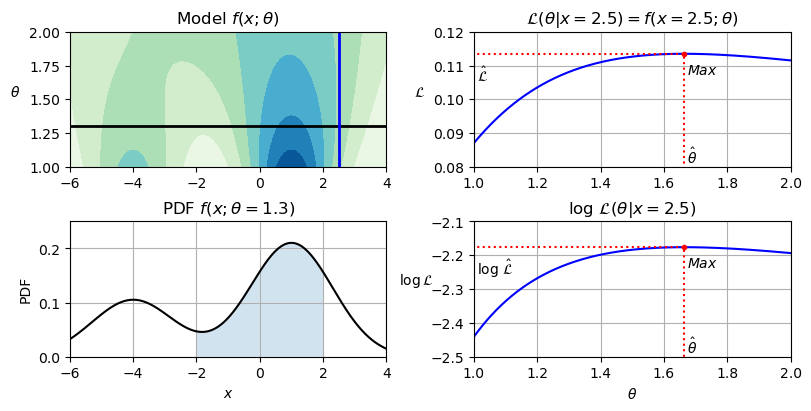

In [205]:
# 1. Visualize a model’s 
# - parametric function (top left), 
# - and some derived functions: a PDF (lower left), 
# - a likelihood function (top right), 
# - and a log likelihood function (lower right)

from scipy.stats import norm

x_val = 2.5
std_val = 1.3
x_range = [-6, 4]
x_proba_range = [-2, 2]
stds_range = [1, 2]

xs = np.linspace(x_range[0], x_range[1], 501)
stds = np.linspace(stds_range[0], stds_range[1], 501)
Xs, Stds = np.meshgrid(xs, stds)
Z = 2 * norm.pdf(Xs - 1.0, 0, Stds) + norm.pdf(Xs + 4.0, 0, Stds)
Z = Z / Z.sum(axis=1)[:, np.newaxis] / (xs[1] - xs[0])

x_example_idx = (xs >= x_val).argmax()  # index of the first value >= x_val
max_idx = Z[:, x_example_idx].argmax()
max_val = Z[:, x_example_idx].max()
s_example_idx = (stds >= std_val).argmax()
x_range_min_idx = (xs >= x_proba_range[0]).argmax()
x_range_max_idx = (xs >= x_proba_range[1]).argmax()
log_max_idx = np.log(Z[:, x_example_idx]).argmax()
log_max_val = np.log(Z[:, x_example_idx]).max()

figm, axm = plt.subplots(2,2,figsize=(8, 4), constrained_layout = True)

axm[0,0].contourf(Xs, Stds, Z, cmap="GnBu")
axm[0,0].plot([-6, 4], [std_val, std_val], "k-", linewidth=2)
axm[0,0].plot([x_val, x_val], [1, 2], "b-", linewidth=2)
axm[0,0].set_ylabel(r"$\theta$", rotation=0, labelpad=10)
axm[0,0].set_title(r"Model $f(x; \theta)$")

axm[0,1].plot(stds, Z[:, x_example_idx], "b-")
axm[0,1].plot(stds[max_idx], max_val, "r.")
axm[0,1].plot([stds[max_idx], stds[max_idx]], [0, max_val], "r:")
axm[0,1].plot([0, stds[max_idx]], [max_val, max_val], "r:")
axm[0,1].text(stds[max_idx]+ 0.01, 0.081, r"$\hat{\theta}$")
axm[0,1].text(stds[max_idx]+ 0.01, max_val - 0.006, r"$Max$")
axm[0,1].text(1.01, max_val - 0.008, r"$\hat{\mathcal{L}}$")
axm[0,1].set_ylabel(r"$\mathcal{L}$", rotation=0, labelpad=10)
axm[0,1].set_title(fr"$\mathcal{{L}}(\theta|x={x_val}) = f(x={x_val}; \theta)$")
axm[0,1].grid()
axm[0,1].axis([1, 2, 0.08, 0.12])

axm[1,0].plot(xs, Z[s_example_idx], "k-")
axm[1,0].fill_between(xs[x_range_min_idx:x_range_max_idx+1],
                 Z[s_example_idx, x_range_min_idx:x_range_max_idx+1], alpha=0.2)
axm[1,0].set_xlabel(r"$x$")
axm[1,0].set_ylabel("PDF")
axm[1,0].set_title(fr"PDF $f(x; \theta={std_val})$")
axm[1,0].grid()
axm[1,0].axis([-6, 4, 0, 0.25])

axm[1,1].plot(stds, np.log(Z[:, x_example_idx]), "b-")
axm[1,1].plot(stds[log_max_idx], log_max_val, "r.")
axm[1,1].plot([stds[log_max_idx], stds[log_max_idx]], [-5, log_max_val], "r:")
axm[1,1].plot([0, stds[log_max_idx]], [log_max_val, log_max_val], "r:")
axm[1,1].text(stds[log_max_idx]+ 0.01, log_max_val - 0.06, r"$Max$")
axm[1,1].text(stds[log_max_idx]+ 0.01, -2.49, r"$\hat{\theta}$")
axm[1,1].text(1.01, log_max_val - 0.08, r"$\log \, \hat{\mathcal{L}}$")
axm[1,1].set_xlabel(r"$\theta$")
axm[1,1].set_ylabel(r"$\log\mathcal{L}$", rotation=0, labelpad=10)
axm[1,1].set_title(fr"$\log \, \mathcal{{L}}(\theta|x={x_val})$")
axm[1,1].grid()
axm[1,1].axis([1, 2, -2.5, -2.1]);

- the PDF is a function of x (with θ fixed)
- the likelihood function is a function of θ (with x fixed)
  - not a probability distribution
- maximizing the likelihood function is equivalent to maximizing its logarithm

In [206]:
# 1.2 Compute AIC and BIC
gm.aic(X), gm.bic(X)

(8102.508425106598, 8189.733705221636)

In [207]:
# 1.3 Computer AIC and BIC manually
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.733705221636
aic = 8102.508425106598
n_params = 17


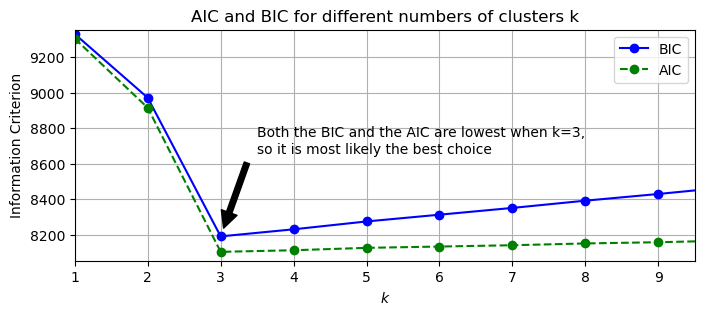

In [208]:
# 1.4 Plot the curves of BIC and AIC vs. the number of clusters k

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

fign, axn = plt.subplots(figsize=(8, 3))
axn.plot(range(1, 11), bics, "bo-", label="BIC")
axn.plot(range(1, 11), aics, "go--", label="AIC")
axn.set_xlabel("$k$")
axn.set_ylabel("Information Criterion")
axn.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
axn.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
axn.set_title('AIC and BIC for different numbers of clusters k')
axn.text(3.5, 8660, "Both the BIC and the AIC are lowest when k=3," 
         "\nso it is most likely the best choice", horizontalalignment="left")
axn.legend()
axn.grid();

## Bayesian Gaussian Mixture Models
- implemented in sklearn `BayesianGaussianMixture` class
- capable of giving weights equal (or close) to zero to unnecessary clusters

In [209]:
# 1. Detect the number of clusters automatically with BayesianGaussianMixture
# set a initial number `n_components=10` large than the best

from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

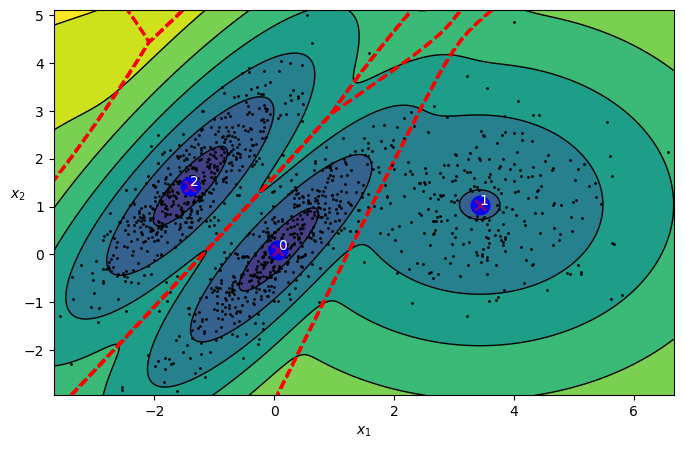

In [210]:
# 1.1 visualize the model's boundaries
figo, axo = plt.subplots(figsize=(8, 5))
plot_gaussian_mixture(axo, bgm, X)

In [211]:
# 2.  Gaussian mixture models work great on clusters with ellipsoidal shapes, 
# but they don’t do so well with clusters of very different shapes.

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)
# the model failed to converge

/opt/micromamba/lib/python3.11/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

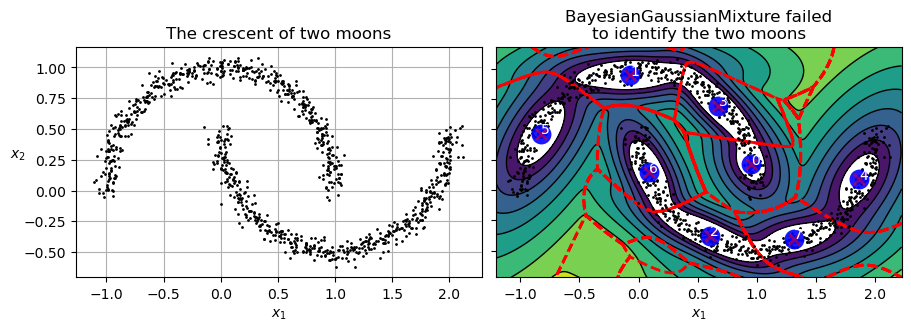

In [212]:
# 2.1 visualize the data set the the model's decision boundaries
figp, axp = plt.subplots(1,2,figsize=(9, 3.2), constrained_layout = True)

plot_data(axp[0], X_moons)
axp[0].set_xlabel("$x_1$")
axp[0].set_ylabel("$x_2$", rotation=0)
axp[0].grid()
axp[0].set_title('The crescent of two moons')

plot_gaussian_mixture(axp[1], bgm, X_moons, show_ylabels=False)
axp[1].set_title('BayesianGaussianMixture failed\nto identify the two moons');

## Other Algorithms for Anomaly and Novelty Detection
- Fast-MCD (minimum covariance determinant)
  - Implemented by the EllipticEnvelope class
- Isolation forest
- Local outlier factor (LOF)
- One-class SVM
- PCA and other dimensionality reduction techniques with an inverse_transform() method

# References
- [sklearn unsupervised learning](https://scikit-learn.org/stable/unsupervised_learning.html)